# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [1]:
import logging

import numpy as np
import pandas as pd

import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.test.test_plots as cptetepl
import core.plotting.correlation as cplocorr
import dataflow.model.test.test_model_plotter as dmtetemopl

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)
/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [5]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-ecc51d7b-8256-4242-8c6d-f1212879d908.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask443_Unit_test_plot_heatmap_from_coreplottingcorrelation.py'
  hash='5b4261208'
  # Last commits:
    * 5b4261208 Samarth KaPatel Update Signing_up_for_Sorrentum.md (#436)                         (    3 days ago) Fri Jul 21 16:11:25 2023  (HEAD -> SorrTask443_Unit_test_plot_heatmap_from_coreplottingcorrelation.py, origin/master, origin/HEAD, master)
    * 624287884 dchoi127 PR for SorrTask395_Unit_test_plotting_galler

# Plots

## `plot_histograms_and_lagged_scatterplot()`

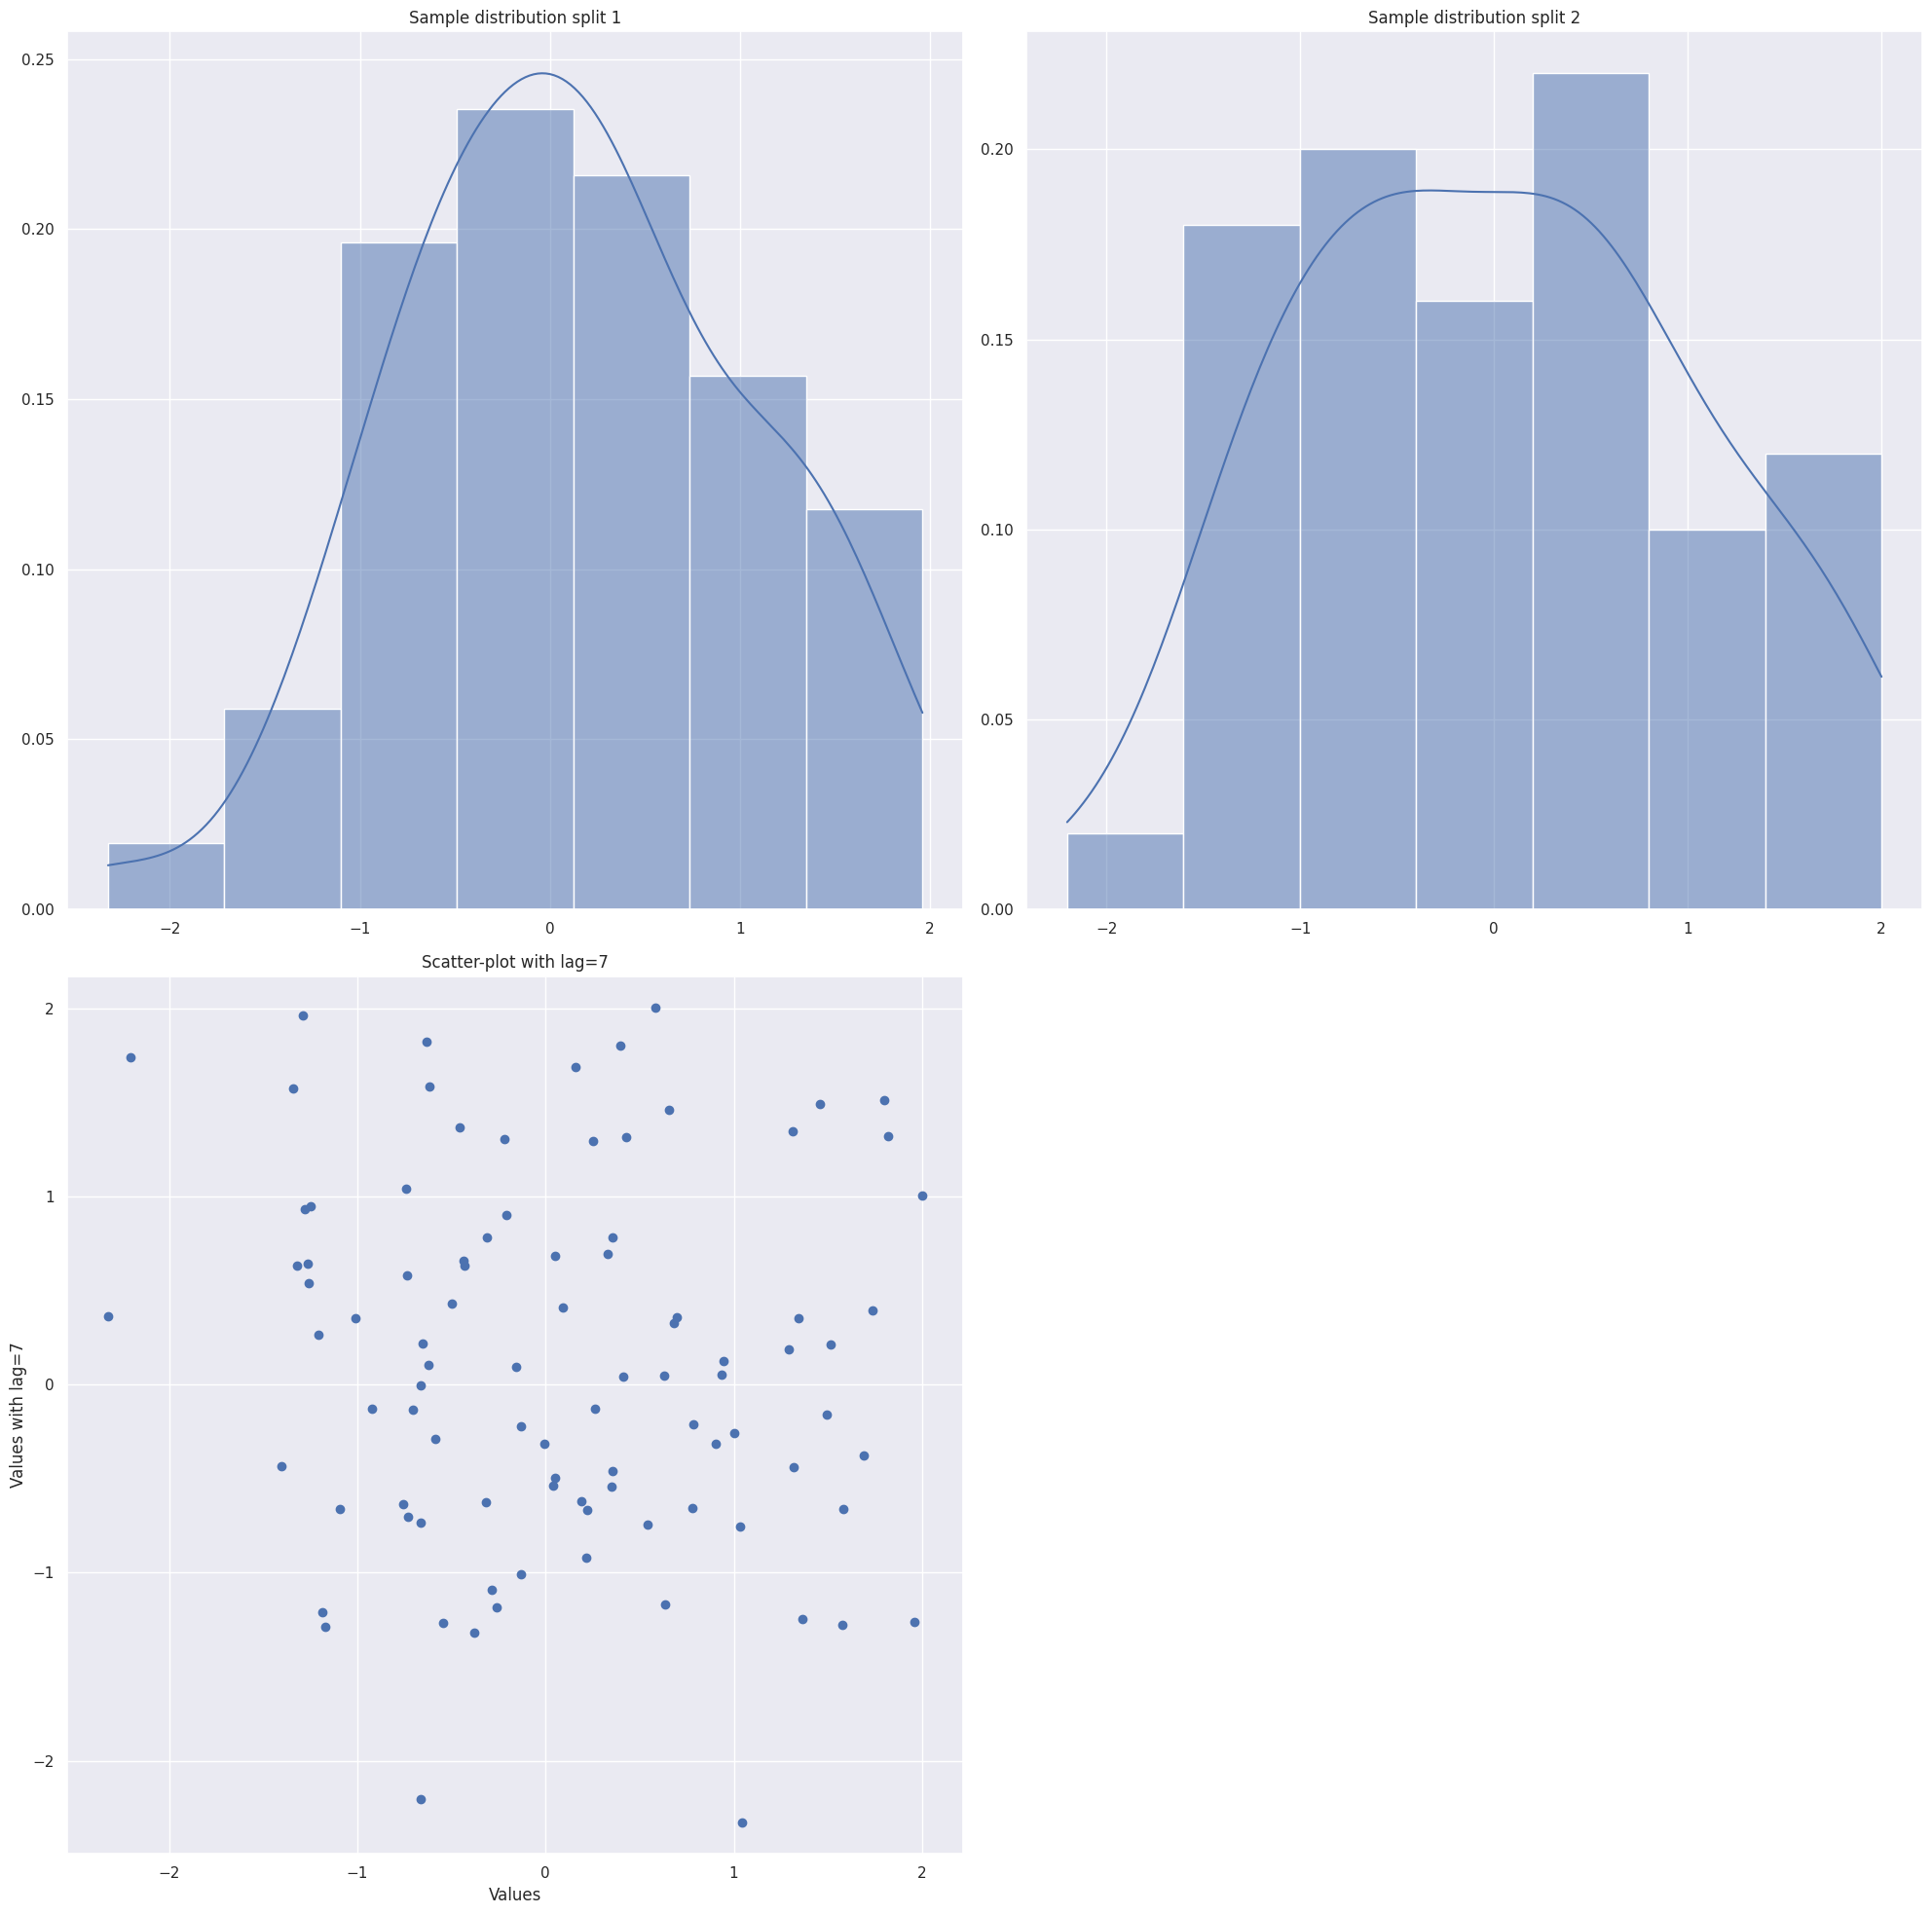

In [6]:
# Set inputs.
srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7
# TODO(Dan): Remove after integration with `cmamp`. Changes from Cm #4722 are not in `sorrentum` yet.
figsize = (20,20)
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_time_series_by_period()`

In [7]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

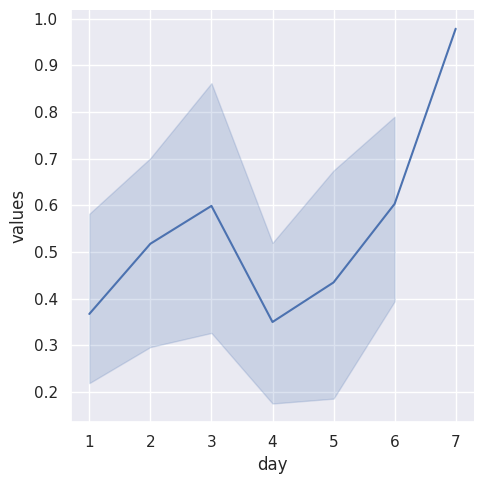

In [8]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

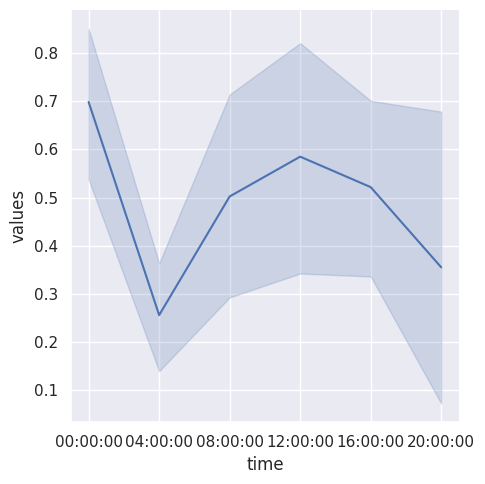

In [9]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)

## `plot_heatmap()`

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


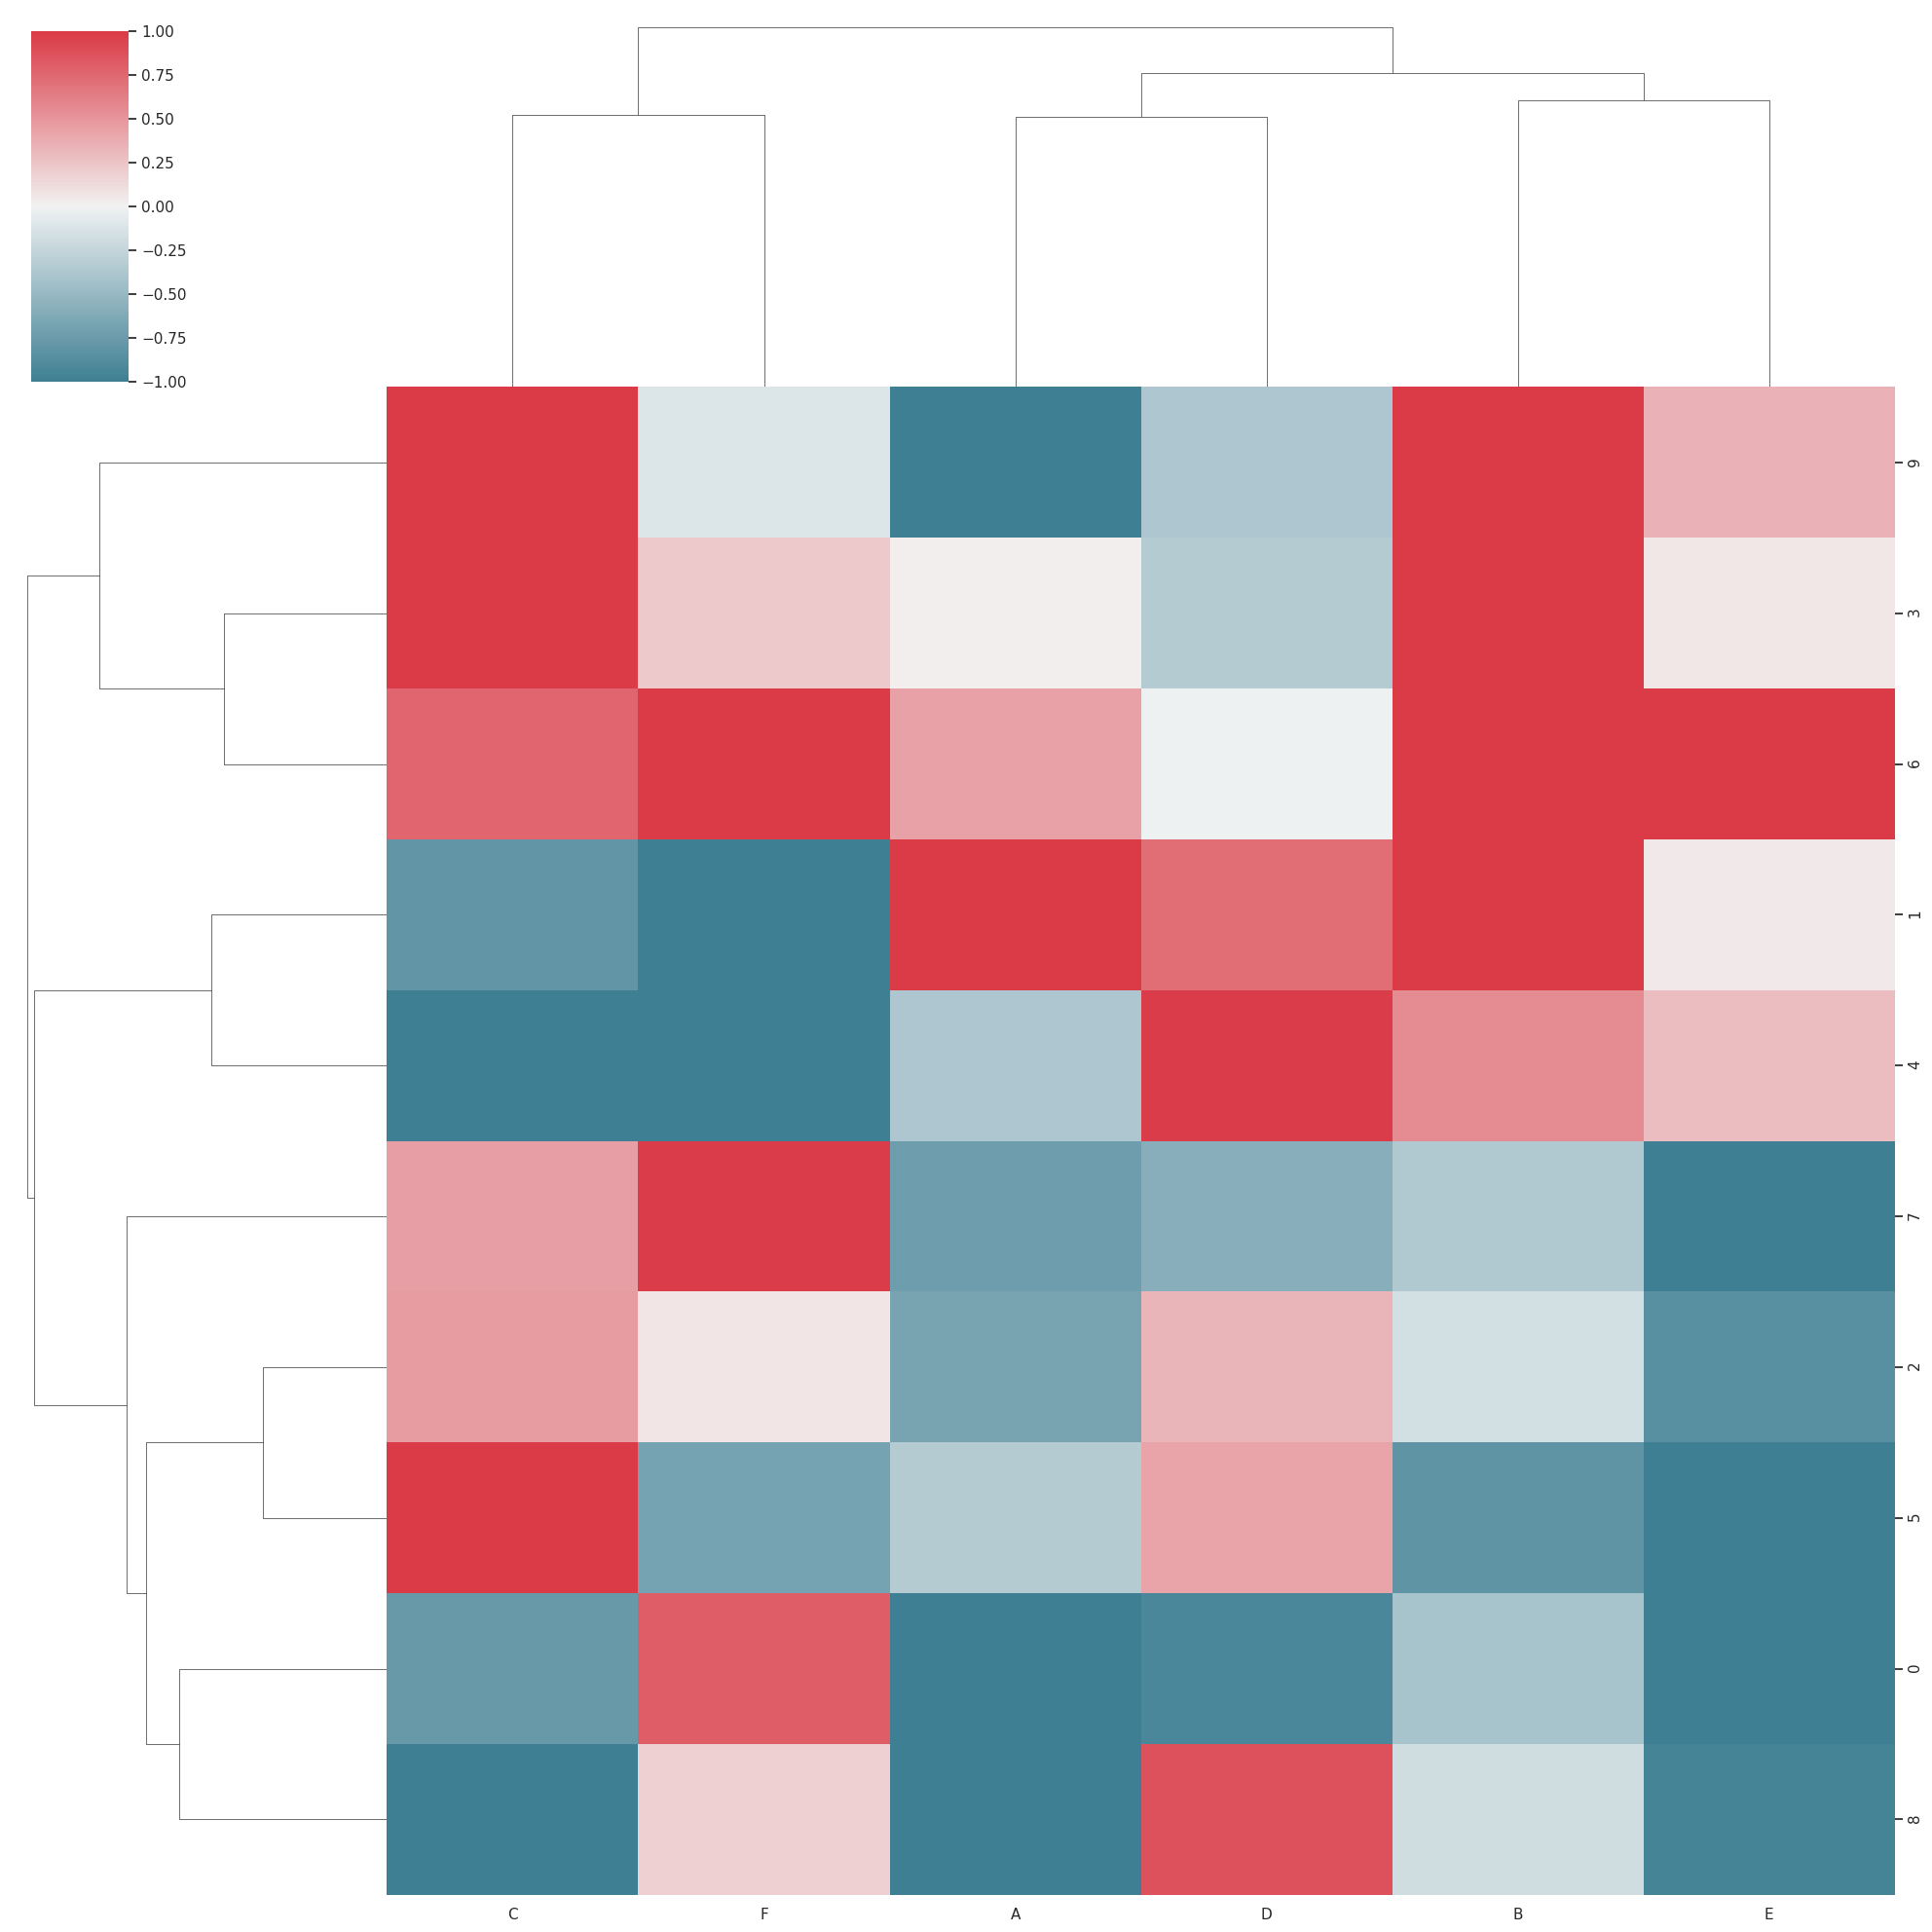

In [12]:
mode = "clustermap"
corr_df = cptetepl.Test_plots.get_plot_heatmap()
figsize = (20, 20)
cplocorr.plot_heatmap(corr_df, mode, figsize=figsize)

## `plot_performance()`

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


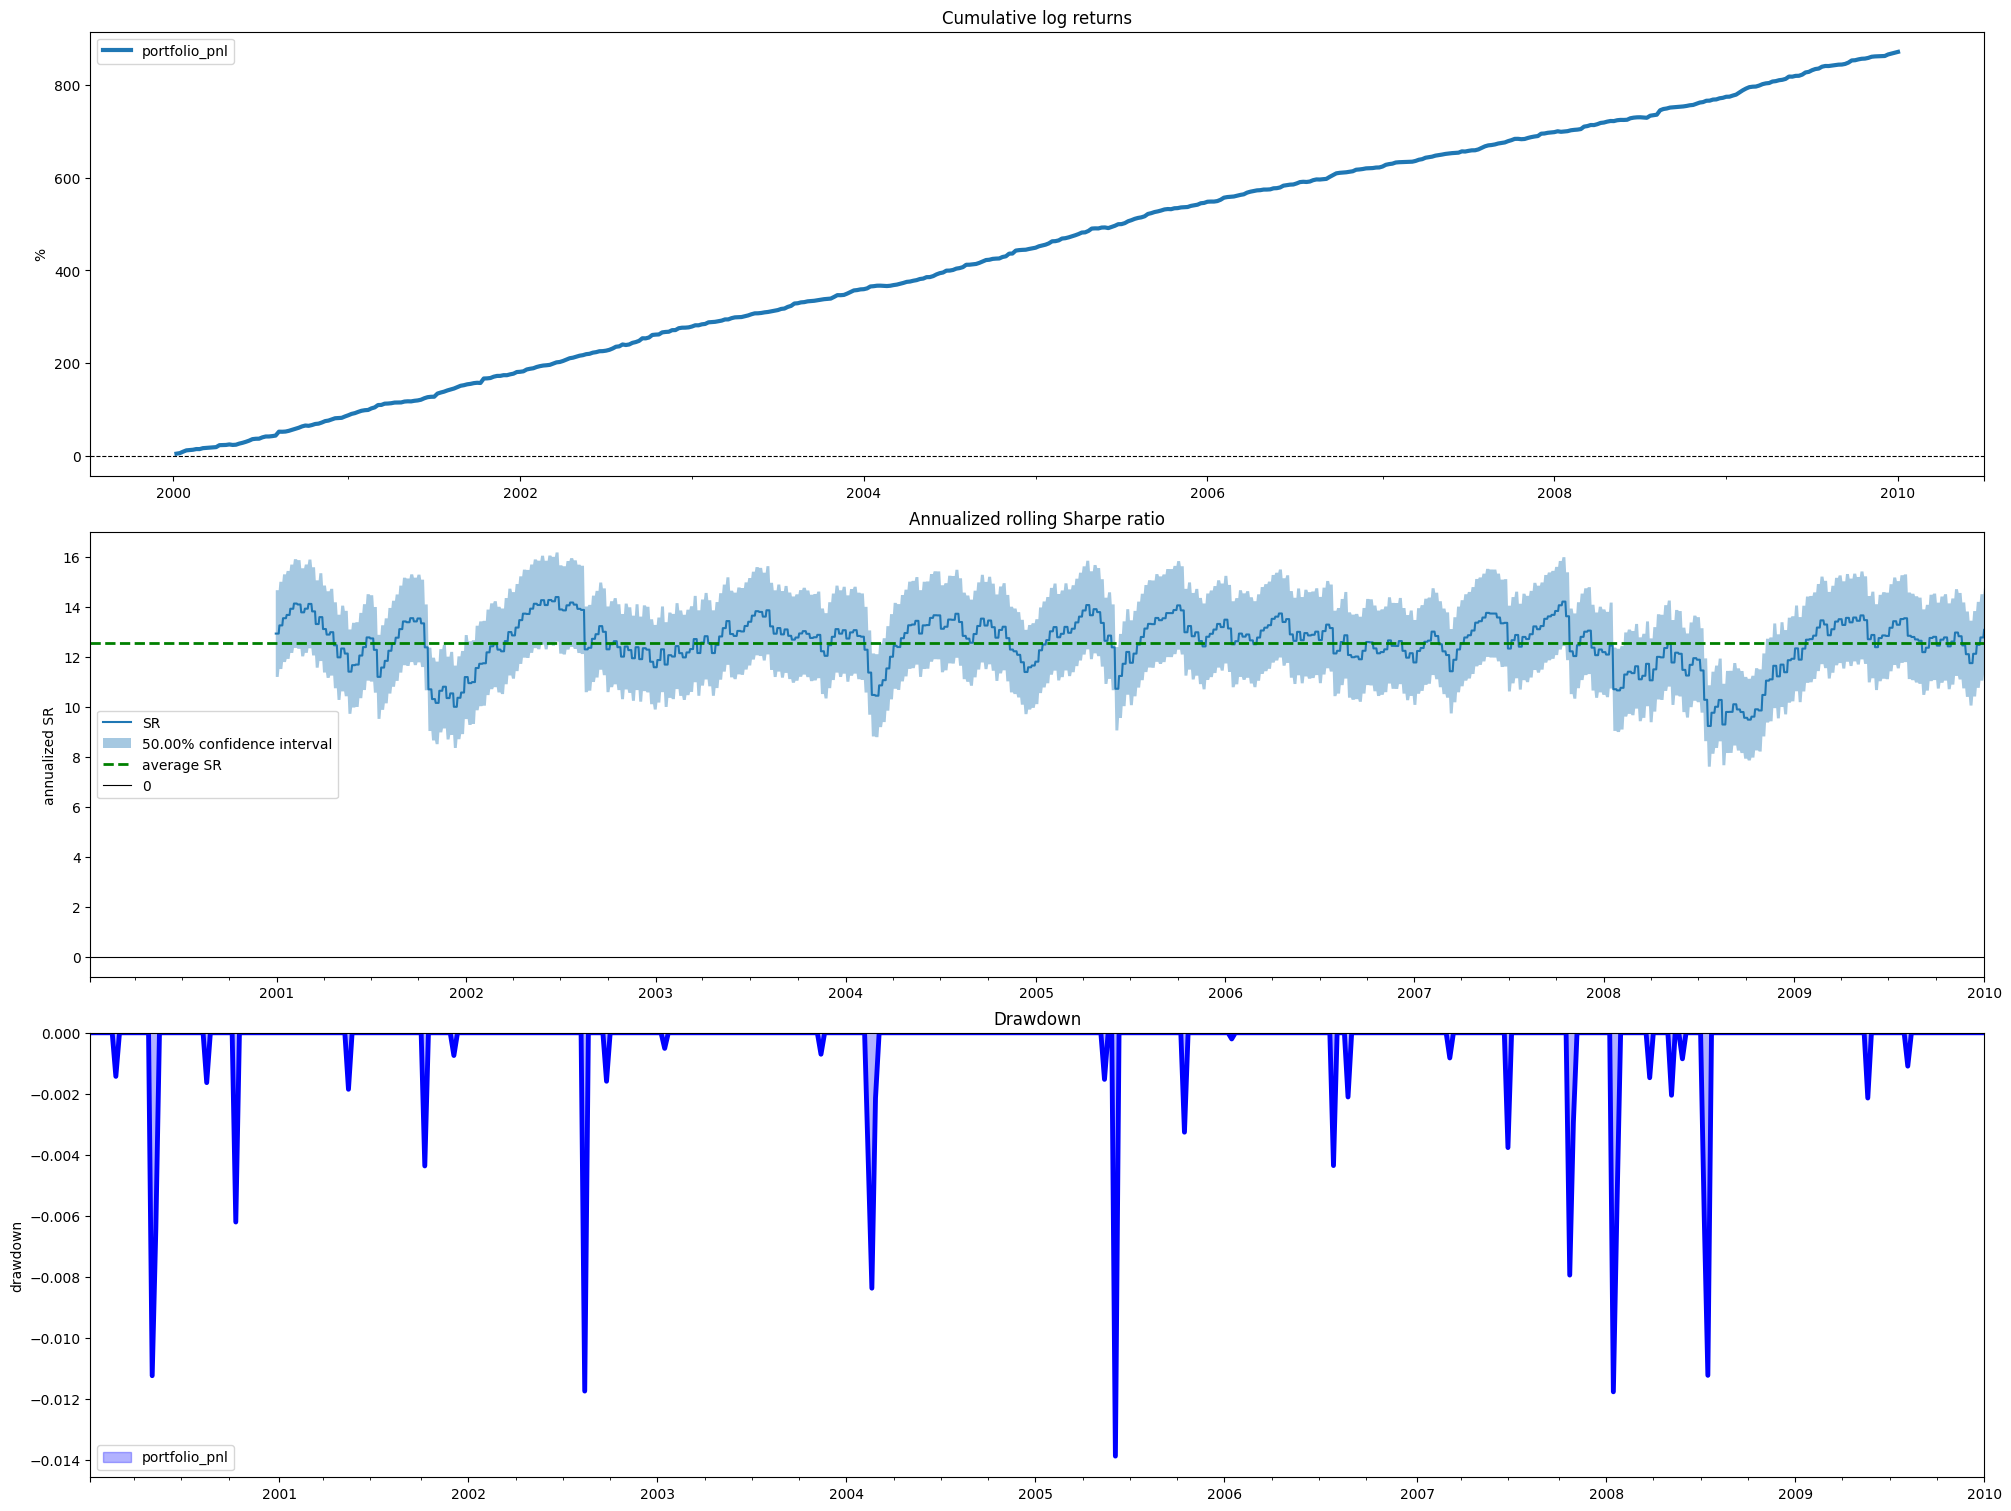

In [2]:
plotter, _, eval_config = dmtetemopl.TestModelPlotter1._get_example_model_plotter()
keys = None
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)